In [93]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting


In [43]:
train_data_set = np.load("fashion_train.npy")
test_data_set = np.load("fashion_test.npy")


# We have 10000 images in the training set
len(train_data_set)

# To find classification for each element, the last value in the set is:
# 0 for T-shirt/top
# 1 for Trousers
# 2 for Pullover
# 3 for Dress
# 4 for Shirt
len(train_data_set[0])

785

In [44]:
# We need to clean the array, as the last value is the classification. Let's first save these separately.

train_classes = []

for i in range(len(train_data_set)):
    train_classes.append(train_data_set[i][784])
      
train_classes = np.array(train_classes)



test_classes = []

for i in range(len(test_data_set)):
    test_classes.append(test_data_set[i][784])
      
test_classes = np.array(test_classes)

In [45]:
# Now we can delete the last element and have a cleaned training set that we can work with.

cleaned_train_set = np.empty((len(train_data_set), 784), dtype=np.uint8)

for i in range(len(train_data_set)):
    temp = np.delete(train_data_set[i], 784)
    cleaned_train_set[i] = temp
    
    
cleaned_test_set = np.empty((len(test_data_set), 784), dtype=np.uint8)

for i in range(len(test_data_set)):
    temp = np.delete(test_data_set[i], 784)
    cleaned_test_set[i] = temp

## Cleaning the data

Our code has a few pixel values that are very close to 0 (thus background), that we remove to reduce the noise in our dataset.

In [47]:
# Cleaning values close to 0 to reduce noise in the images.

for i in cleaned_train_set:
    for j in range(784):
        if i[j] < 14:
            i[j] = 0
            
            
for i in cleaned_test_set:
    for j in range(784):
        if i[j] < 14:
            i[j] = 0

In [48]:
# We reshape it so that the 1D array becomes a 2D 28x28 array.
cleaned_train_set_reshaped = cleaned_train_set.reshape(-1, 28, 28)
cleaned_test_set_reshaped = cleaned_test_set.reshape(-1, 28, 28)

In [49]:
# Two simple functions for working with our data

def show_image(index_num):
    '''
    Simple function for showing the image and printing the category.
    
    index_num: The index you would like to show.
    '''
    img = cleaned_train_set_reshaped[index_num]
    #img2 = np.invert(img)
    plt.imshow(np.invert(img), cmap ='gray', vmin = 0, vmax = 255)
    plt.show()
    text = ""

    cloth_cat = train_classes[index_num]
    if cloth_cat == 0:
        text = "0: This is a t-shirt/top"
    if cloth_cat == 1:
        text = "1: This is a pair of trousers"
    if cloth_cat == 2:
        text = "2: This is a pullover"
    if cloth_cat == 3:
        text = "3: This is a dress"
    if cloth_cat == 4:
        text = "4: This is a shirt"
    
    print(text)
    return text
        
def count_categories(categories):
    '''
    Another stupidly simple function for counting the categories.
    
    categories: The numpy array of all categories, corresponding to index number.
    '''  
    ze_val = on_val = tw_val = th_val = fo_val = 0
    
    for i in categories:
        if i == 0:
            ze_val += 1
        if i == 1:
            on_val += 1
        if i == 2:
            tw_val += 1
        if i == 3:
            th_val += 1
        if i == 4:
            fo_val += 1
    
    print(f'There are {ze_val} t-shirts/tops. There are {on_val} pairs of trousers. There are {tw_val} pullovers. There are {th_val} dresses. There are {fo_val} shirts.')
    

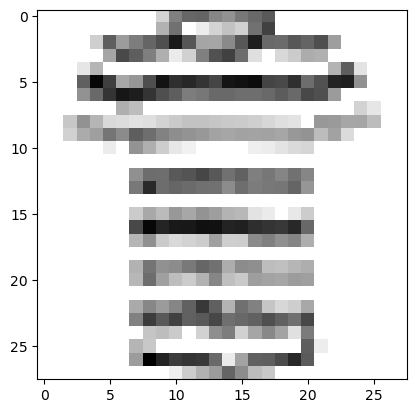

0: This is a t-shirt/top
There are 2033 t-shirts/tops. There are 1947 pairs of trousers. There are 2001 pullovers. There are 2005 dresses. There are 2014 shirts.


In [9]:
show_image(55)

count_categories(train_classes)

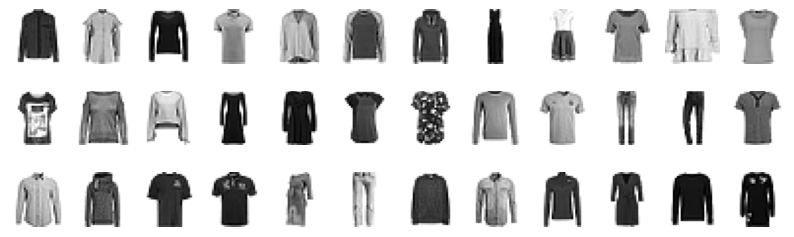

In [10]:
fig, axarr = plt.subplots( 3, 12, figsize=(10, 3))
ax = plt.Axes(fig, [0, 0, 1, 1.])
for y, a in enumerate(axarr[1]):
    axarr[0,y].set_axis_off()
    axarr[1,y].set_axis_off()
    axarr[2,y].set_axis_off()
    axarr[0,y].imshow((np.invert(cleaned_train_set_reshaped[random.randint(0,9999)])), cmap='gray')
    axarr[1,y].imshow((np.invert(cleaned_train_set_reshaped[random.randint(0,9999)])), cmap='gray')
    axarr[2,y].imshow((np.invert(cleaned_train_set_reshaped[random.randint(0,9999)])), cmap='gray')

In [50]:
print(cleaned_train_set_reshaped.shape)
print(cleaned_test_set_reshaped.shape)

(10000, 28, 28)
(5000, 28, 28)


## Plotting the data

Transformed data shape: (10000, 20)
Explained variance ratio: [0.32236381 0.16238261 0.07740525 0.04167387 0.03283027 0.02240922
 0.01942308 0.01783966 0.01497458 0.01273735 0.01136564 0.00970145
 0.00833339 0.00743679 0.00731606 0.00678147 0.00670589 0.00638648
 0.00566394 0.00504306]


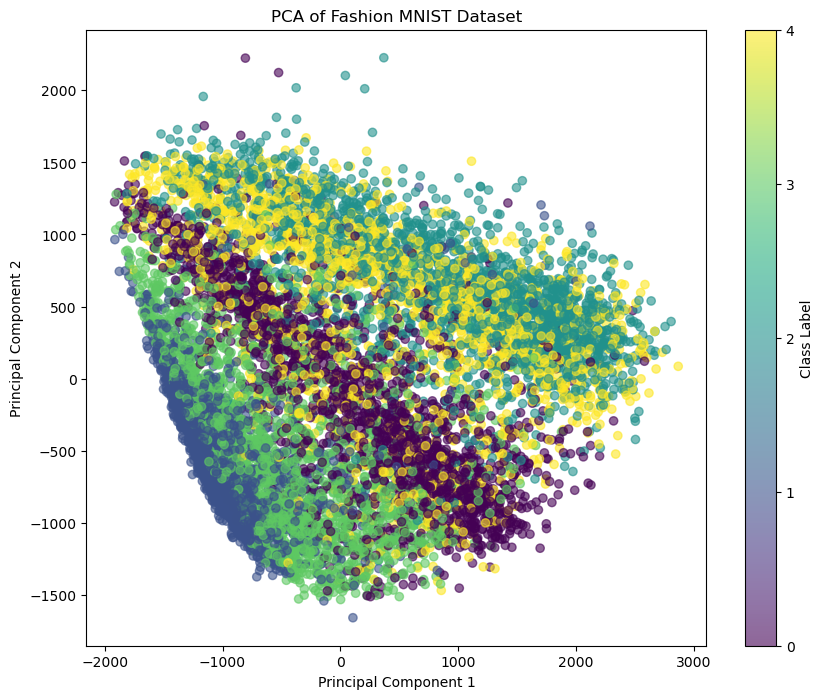

In [12]:
# Perform PCA
pca = PCA(n_components=20)  # You can adjust this number if needed
pca_train_result = pca.fit_transform(cleaned_train_set)

# Print the shapes and explained variance ratio
print("Transformed data shape:", pca_train_result.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Visualize the first two principal components
pca_2d = pca_train_result[:, :2]  # Get the first two components

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=train_classes, cmap='viridis', alpha=0.6)

# Add colorbar
plt.colorbar(scatter, ticks=range(10), label='Class Label')

# Label axes and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fashion MNIST Dataset')

# Show the plot
plt.show()


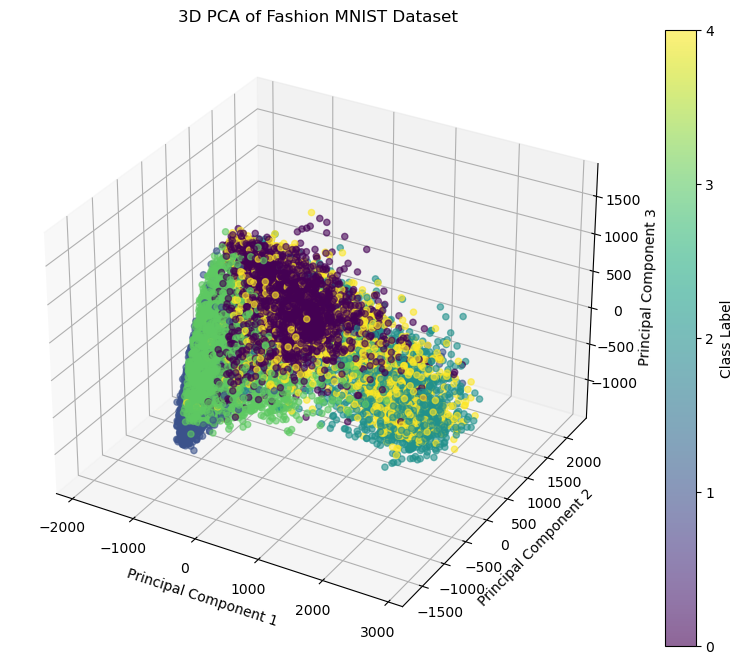

In [13]:
# Get the first three principal components
pca_3d = pca_train_result[:, :3]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
scatter = ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], c=train_classes, cmap='viridis', alpha=0.6)

# Add a color bar
plt.colorbar(scatter, ticks=range(10), label='Class Label')

# Set labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Fashion MNIST Dataset')

# Show the plot
plt.show()

The axes' values are very large. Not very useful and can lead to weird model behavior. Therefore, let's do:

## Dimensional reduction using PCA

In [60]:
# Standardize the data
scaler = StandardScaler()
standardized_train_data = scaler.fit_transform(cleaned_train_set)

# Also apply standardization to test data
standardized_test_data = scaler.transform(cleaned_test_set)


In [61]:
# Time to find the right number of PCA components, as we want the components to explain 90% of the variance in total.
pca_components = len(standardized_train_data[0])
pca = PCA(pca_components)
pca_train_result = pca.fit_transform(standardized_train_data)


pca_sum_list = [pca.explained_variance_ratio_[0]]
i = 1

while sum(pca_sum_list) < 0.90:
    pca_sum_list.append(pca.explained_variance_ratio_[0+i])
    i += 1

In [62]:
len(pca_sum_list)

112

#### NOTE: Add a cumulative explained variance by Principal Components graph

Transformed data shape: (10000, 113)
Explained variance ratio: [0.22603368 0.13609817 0.06358945 0.05010653 0.03062702 0.02909299
 0.02197392 0.01885609 0.01473657 0.01421748 0.01296357 0.0123481
 0.01009283 0.00926477 0.00884594 0.00841715 0.00791795 0.00741845
 0.00719492 0.00682203 0.00638955 0.0062316  0.00593573 0.00557688
 0.005205   0.0050137  0.00493918 0.00478883 0.00455162 0.0044037
 0.00420612 0.00405006 0.00396849 0.00389328 0.00379286 0.00364704
 0.00359467 0.00354001 0.00334749 0.00325407 0.00318966 0.00314184
 0.00302832 0.00292203 0.00276836 0.00273278 0.00264282 0.00259011
 0.00245171 0.00244806]


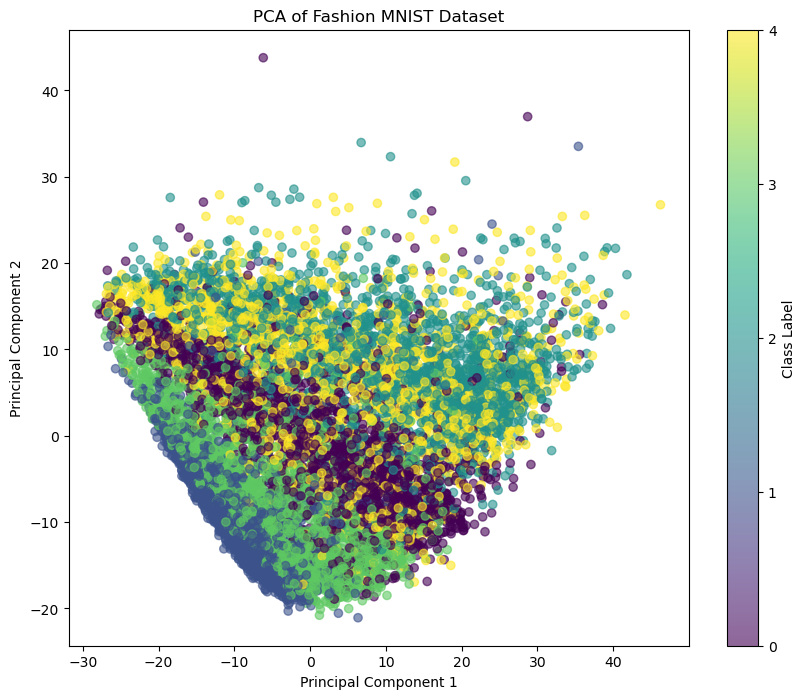

In [63]:
# Print the shapes and explained variance ratio
pca_components = len(pca_sum_list)+1
pca = PCA(pca_components)
pca_train_result = pca.fit_transform(standardized_train_data)
pca_test_result = pca.transform(standardized_test_data)

print("Transformed data shape:", pca_train_result.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_[:50])

# Visualize the first two principal components
pca_2d = pca_train_result[:, :2]  # Get the first two components

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=train_classes, cmap='viridis', alpha=0.6)

# Add colorbar
plt.colorbar(scatter, ticks=range(10), label='Class Label')

# Label axes and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fashion MNIST Dataset')

# Show the plot
plt.show()


In [64]:
# At 113 principal components. 
sum(pca.explained_variance_ratio_)

0.9002180172514074

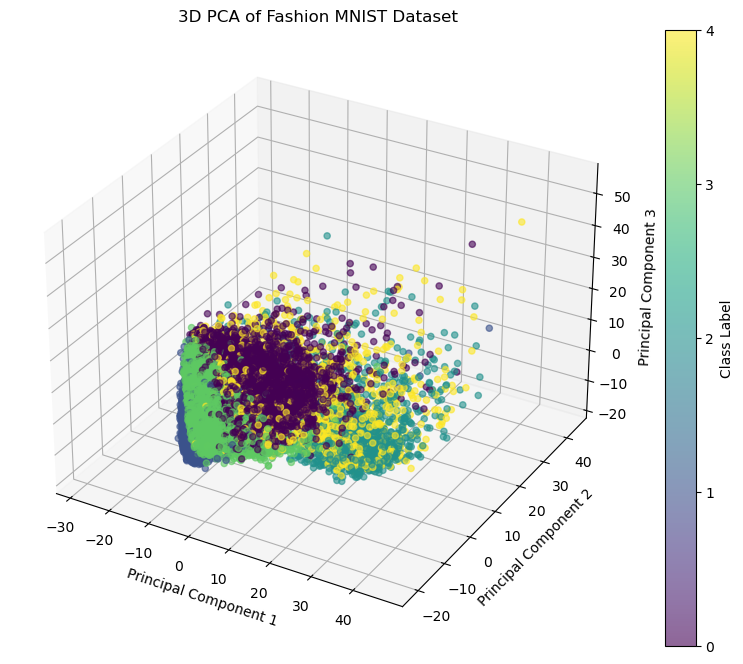

In [65]:
# For an interactive 3D plot, use plotly.express

# Get the first three principal components
pca_3d = pca_train_result[:, :3]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
scatter = ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], c=train_classes, cmap='viridis', alpha=0.6)

# Add a color bar
plt.colorbar(scatter, ticks=range(10), label='Class Label')

# Set labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Fashion MNIST Dataset')

# Show the plot
plt.show()

In [ ]:
# TO BE DONE: Find a method that gives the lowest test error rate (and not training error rate) (p. 35) Lets get started on KNN
# 

array([-5.30406428e-01,  2.51085058e+00,  8.46283235e+00, -3.74728904e+00,
       -1.04474961e+00, -5.49505741e+00,  6.45558431e-01, -3.00648359e+00,
       -6.56198226e-01,  3.27274901e+00, -4.64358554e-01, -2.38811581e-01,
        1.34823702e+00,  1.32608058e+00, -1.92999290e+00,  4.22001218e-01,
       -1.39207589e-01,  3.59334755e-01,  4.48482389e-01,  1.88449065e-01,
        1.06067904e+00,  5.13660188e-01,  1.47875158e+00,  2.91166707e-01,
       -8.03644474e-01,  1.85853251e+00,  2.83049233e-01,  2.14112707e+00,
        1.55563399e+00, -3.06559415e-01,  7.93271411e-01, -1.32790471e+00,
       -3.46633890e-01,  4.07381366e-01, -7.12646423e-01,  1.30559600e+00,
        3.15724835e-01,  1.47991898e+00, -2.97588744e-01,  4.35094548e-01,
       -1.51459206e+00, -9.44442379e-01, -5.05604819e-01, -1.87886393e-01,
        1.95821697e-01,  6.38106716e-01, -3.28692206e-01, -1.78745645e+00,
        2.37118329e-02,  7.36361039e-01,  6.31687632e-01, -2.66394331e-01,
       -1.64313181e+00, -

In [99]:
# Load training data
X, y = pca_train_result, train_classes
X_test, y_test = pca_test_result, test_classes

classifier_dec_tree = DecisionTreeClassifier()


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25)

In [ ]:
# Wrap into a dataframe
feature_list = []
feature_names = []
num_of_pca = 5

for i in range(num_of_pca):
    feature_names.append("x"+str(i+1))
    

#data = {"x1": x1, "x2": x2, "y": y}
#df = pd.DataFrame.from_dict(data)

In [109]:
list_test = []

for i in range(len(X_train)):
    for j in range(len(feature_names)):
        list_test.append(X_train[i][j])
    

In [113]:
X_train[0][1]

-12.07505798011806

In [110]:
list_test

[-11.12898669738768,
 -12.07505798011806,
 -5.445101385497133,
 8.203370771221596,
 5.0279978852001035,
 -9.0938063063943,
 15.070830379840391,
 -1.8053283109112301,
 1.4265645115192418,
 -2.89644860974657,
 -4.336683108788832,
 9.97445572999562,
 -5.6462248430109385,
 -4.124372271308662,
 1.9440932956874326,
 -6.062895820246484,
 10.485609403214928,
 -3.9908492890227176,
 -6.0792142231256925,
 0.9496159141600164,
 -18.11851730250803,
 0.23827374740658344,
 -1.8986111883199097,
 2.906230467256194,
 2.3255687122918625,
 9.722993435609899,
 -5.3424180439867515,
 9.137595044649576,
 -3.6358208302971433,
 -1.4333659197273678,
 27.451460476529597,
 4.498701203485088,
 37.128518343193036,
 5.0406946871215625,
 51.070998141630525,
 -21.799218789426995,
 9.967671787622896,
 0.15722221477901047,
 0.33461404364052333,
 -0.11010408112561343,
 -14.33045804862695,
 -5.122697317967908,
 -2.113607516994397,
 3.3972289944872833,
 -4.741187940411576,
 -2.1750721539527182,
 -10.44333499187807,
 -1.21902

In [101]:
pca_train_result[0]

array([-5.30406428e-01,  2.51085058e+00,  8.46283235e+00, -3.74728904e+00,
       -1.04474961e+00, -5.49505741e+00,  6.45558431e-01, -3.00648359e+00,
       -6.56198226e-01,  3.27274901e+00, -4.64358554e-01, -2.38811581e-01,
        1.34823702e+00,  1.32608058e+00, -1.92999290e+00,  4.22001218e-01,
       -1.39207589e-01,  3.59334755e-01,  4.48482389e-01,  1.88449065e-01,
        1.06067904e+00,  5.13660188e-01,  1.47875158e+00,  2.91166707e-01,
       -8.03644474e-01,  1.85853251e+00,  2.83049233e-01,  2.14112707e+00,
        1.55563399e+00, -3.06559415e-01,  7.93271411e-01, -1.32790471e+00,
       -3.46633890e-01,  4.07381366e-01, -7.12646423e-01,  1.30559600e+00,
        3.15724835e-01,  1.47991898e+00, -2.97588744e-01,  4.35094548e-01,
       -1.51459206e+00, -9.44442379e-01, -5.05604819e-01, -1.87886393e-01,
        1.95821697e-01,  6.38106716e-01, -3.28692206e-01, -1.78745645e+00,
        2.37118329e-02,  7.36361039e-01,  6.31687632e-01, -2.66394331e-01,
       -1.64313181e+00, -

In [100]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

7500
7500
2500
2500
5000
5000


In [378]:
# Load training data
X_train, y_train = train_data_set[["x1", "x2"]], train_data_set["y"]

# Load test data
test = pd.read_csv("Ex1-test.csv")
X_test, y_test = test[["x1", "x2"]],test["y"]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [69]:
# COPIED FROM EXERCISE 12 

# First we need to get this first class

class SplitQuality:
    """Class gathering several methods for evaluating entropy of given split

    Notes
    -----
    All methods and attributes whose name starts with _ mean that they are private, i.e., these methods 
    should not be called by client. There is no way how I can enforce in python, but just so you know
    the reason behind this as you might encounter it when reading for instance source code of sklearn. :)
    """

    def __init__(self, left=None, right=None, name=None, debug=False):
        # Assign splits
        self._left, self._right = left, right

        # Assign counts in each split
        if left is not None and right is not None:
            self._n1, self._n2 = left.shape[0], right.shape[0]
        else:
            self._n1, self._n2 = None, None
        
        # Assign name of the split
        self._name = name

        # Debug
        self.debug = debug


    def _weighted_average(self, weights, values):
        """Computes weighted average

        Attributes
        ----------
        weights : 1d array
            weights to corresponding values
        
        values : 1d array
            values that we want to take weighted average of (impurities)
        
        Returns
        -------
        wavg : float
            Weighted average of values
        """
        wavg = ((weights*values).sum())/weights.sum()
        return wavg

    def _predict(self, y):
        """Predict to the class with highest count

        Attributes
        ----------
        y : 1d array
            y values corresponding to the given split

        Returns
        -------
        majority_class : int
            Id of the class with highest count        
        """

        counts = [(k, count) for k, count in y.value_counts().to_dict().items()]
        majority_class = sorted(counts, key=lambda t: t[1], reverse=True)[0][0]
        return majority_class
    
    def _get_error_rate(self, y):
        """Returns error rate for given set y

        Attributes
        ----------
        y : 1d array
            y values corresponding to the given split

        Returns 
        -------
        clf_error : float
            Float between 0 (pure) and 1 (totally impure)
        """
        # Yhat is a single value indicating the majority class in y
        yhat = self._predict(y)

        # Compute the error
        n = y.shape[0]
        clf_error = (y != yhat).sum()/n

        return clf_error
    
    def _get_gini(self, y):
        """Return gini impurity for given set

        Attributes
        ----------
        y : 1d array
            y values corresponding to the given split
        
        Returns
        -------
        gini : float
            Float between 0 (pure) and .5 (totally impure) for binary classification
        
        Notes
        -----
        With regards to the upper bound, I believe that there is not any. But in general, it does not
        really matter, since you care about minizing the impurity anyway. And lower bound is no matter what
        always 0.
        """
        # Get counts for each class
        counts = y.value_counts().to_dict()

        # Get total number of samples
        total = y.shape[0]

        # Compute gini following the formula above
        gini = 0
        for count in counts.values():
            p = count/total
            gini += p*(1 - p)
        
        return gini
    
    def _get_entropy(self, y):
        """Return entropy for given set

        Attributes
        ----------
        y : 1d array
            y values corresponding to the given split
        
        Returns
        -------
        entropy : float
            Float between 0 (pure) and 1 (totally impure) for binary classification
        
        Notes
        -----
        With regards to the upper bound, same applies for entropy as for gini impurity.
        """
        # Get counts for each class
        counts = y.value_counts().to_dict()

        # Get total number of samples
        total = y.shape[0]

        # Compute gini following the formula above
        entropy = 0
        for count in counts.values():
            p = count/total
            entropy += p*(np.log(p))
        
        return -entropy
    
    def summary(self):
        """Returns impurities for provided splits
        """

        # Setup needed variables
        metrics = [self._get_error_rate, self._get_gini, self._get_entropy]
        names = ["Error rate", "Gini", "Entropy"]
        weights = np.array([self._n1, self._n2])
        wimpurities = []

        if self.debug: print(f"Weighted impurity for the {self._name} split\n---")
        for name, metric in zip(names, metrics):

            # Compute the impurity for both nodes
            left_imp = metric(self._left["y"])
            right_imp = metric(self._right["y"])
            values = np.array([left_imp, right_imp])

            # Account for node sizes using weighted average of the two
            wimpurity = self._weighted_average(weights, values)
            wimpurities.append(wimpurity)

            # Report
            if self.debug: print("{}: {:.3f}".format(name, wimpurity))
        if self.debug: print()

        return wimpurities
    
    def summary2(self, y, name):
        """Returns impurities for given dataset y
        """

        # Setup needed variables
        metrics = [self._get_error_rate, self._get_gini, self._get_entropy]
        names = ["Error rate", "Gini", "Entropy"]
        impurities = []

        if self.debug: print(f"Impurity for the {name} split\n---")
        for name, metric in zip(names, metrics):
            # Compute the impurity
            imp = metric(y)
            impurities.append(imp)

            # Report
            if self.debug: print("{}: {:.3f}".format(name, imp))
        if self.debug: print()

        return impurities

In [70]:
# COPIED FROM EXERCISE 12

class SimpleDecisionTree:

    def __init__(self, debug=False, criterion='gini'):

        # Splitting criteria
        self.feature_idx = None
        self.features_thrs = None

        # Define to which class to classify for each split
        self.left = None
        self.right = None

        # Debugging
        self.debug = debug

        # Define possible criterions to use
        self.criterions = ["error rate", "gini", "entropy"]
        self.cidx = self.criterions.index(criterion)

    def fit(self, X):
        """
        Finds the best split for provided data and saves it as part of class attributes
        """
        # number of features
        p = X.shape[1] - 1

        # collect best impurities and splits for each feature
        best_splits = []
        best_impurities = []

        for j in range(p):
            # sorted unique feature values
            fvalues = X.iloc[:, j].unique()
            fvalues.sort()
            n = fvalues.shape[0]

            # Compute impurity for all possible splits
            splits = []
            impurities = []
            for i in range(1, n):
                # Compute the split
                prev, curr = fvalues[i - 1], fvalues[i]
                split = (prev + curr)/2

                # Compute impurities in this order: error rate, gini, entropy
                left, right = X[X.iloc[:, j] < split], X[X.iloc[:, j] >= split]
                quality = SplitQuality(left, right, f"Feature x{j + 1} and threshold {split}", debug=self.debug)
                imps = quality.summary()

                # Save the chosen impurity along with the coresponding split (threshold) value
                splits.append(split)
                impurities.append(imps[self.cidx])
            
            # Obtain the lowest impurity for given feature with corresponding split value
            idxbest = np.argmin(impurities)
            best_splits.append(splits[idxbest])
            best_impurities.append(impurities[idxbest])

        # Save the best split out of all
        self.feature_idx = np.argmin(best_impurities)
        self.features_thrs = best_splits[self.feature_idx]

        # Determine which classes would be predicted in each child node
        # -- Get the splits
        left = X[X.iloc[:, self.feature_idx] < self.features_thrs]
        right = X[X.iloc[:, self.feature_idx] >= self.features_thrs]

        # -- Get the majority classes in each node
        self.left = SplitQuality()._predict(left["y"])
        self.right = SplitQuality()._predict(right["y"])

        return self

    
    def predict(self, x):
        """For given point, predicts corresponding class.
        """
        
        if self.feature_idx is None:
            print("Tree has not been fitted yet.")
            return
 
        feature_val = x[self.feature_idx]
        if feature_val < self.features_thrs:
            return self.left
        else:
            return self.right
    
    def summary(self):
        print(f"Best split information\n---")
        print(f">> use feature x{self.feature_idx + 1}")
        print(f">> and make a split at {self.features_thrs}")

In [ ]:
# For making a Convolution Neural Network, we can use the python library Keras or TensorFlow(much easier!! Use this)
# After implementation, find a convolution matrix #and use ConfusionMatrixDisplay for graphic display